This IPython notebook shows how word vectors are used in Spacy

In [16]:
import spacy
doc = "goat pig sheep boar cat dog lion puma tiger shark whale fish alligator crocodile"
nlp = spacy.load('en_vectors_web_lg')

In [18]:
tokens = nlp(doc)
#let us get the first 5 elements of vector for the first token "goat"
print(tokens[0].vector[:5])

[-0.85893 -0.11558  0.38278 -0.37396 -0.11016]


In [19]:
#how similar is a goat to a pig?
print(tokens[0].similarity(tokens[1]))
#how similar is a goat to a sheep?
print(tokens[0].similarity(tokens[2]))

0.63421
0.7182427


In [20]:
#Let us create an array of similarities
import numpy as np
array = np.ones((len(tokens), len(tokens)))
for row in range(len(tokens) - 1):
    for col in range(row, len(tokens)):
        sim = tokens[row].similarity(tokens[col])
        array[row][col] = sim
        array[col][row] = sim
#display array
print(array)

[[1.         0.63420999 0.7182427  0.6016466  0.38603598 0.43964866
  0.4703832  0.18229339 0.34363917 0.30794644 0.36724773 0.36817071
  0.40233487 0.4151119 ]
 [0.63420999 1.         0.64002073 0.57897091 0.54926527 0.56925416
  0.49023321 0.17442644 0.43495277 0.42430505 0.43393204 0.4944995
  0.45165887 0.45570442]
 [0.7182427  0.64002073 1.         0.52828884 0.38271171 0.46427047
  0.47781622 0.18111247 0.31490043 0.30267307 0.38690171 0.38460892
  0.2869868  0.39061809]
 [0.6016466  0.57897091 0.52828884 1.         0.3654899  0.39094374
  0.5312596  0.24728522 0.49289158 0.36420202 0.36524141 0.37074336
  0.51592857 0.47155023]
 [0.38603598 0.54926527 0.38271171 0.3654899  1.         0.80168551
  0.52654368 0.28332883 0.54133892 0.41694969 0.33757505 0.41806531
  0.35702607 0.32174614]
 [0.43964866 0.56925416 0.46427047 0.39094374 0.80168551 1.
  0.47424489 0.23041582 0.43654659 0.36990902 0.33376542 0.40854347
  0.37884989 0.29960123]
 [0.4703832  0.49023321 0.47781622 0.531259

In [21]:
#put the array in a dataframe
import pandas as pd
columns = [token.text for token in tokens]
print(columns)
df = pd.DataFrame(array, columns = columns, index = columns)
df

['goat', 'pig', 'sheep', 'boar', 'cat', 'dog', 'lion', 'puma', 'tiger', 'shark', 'whale', 'fish', 'alligator', 'crocodile']


,goat,pig,sheep,boar,cat,dog,lion,puma,tiger,shark,whale,fish,alligator,crocodile
goat,1.000000,0.634210,0.718243,0.601647,0.386036,0.439649,0.470383,0.182293,0.343639,0.307946,0.367248,0.368171,0.402335,0.415112
pig,0.634210,1.000000,0.640021,0.578971,0.549265,0.569254,0.490233,0.174426,0.434953,0.424305,0.433932,0.494500,0.451659,0.455704
sheep,0.718243,0.640021,1.000000,0.528289,0.382712,0.464270,0.477816,0.181112,0.314900,0.302673,0.386902,0.384609,0.286987,0.390618
boar,0.601647,0.578971,0.528289,1.000000,0.365490,0.390944,0.531260,0.247285,0.492892,0.364202,0.365241,0.370743,0.515929,0.471550
cat,0.386036,0.549265,0.382712,0.365490,1.000000,0.801686,0.526544,0.283329,0.541339,0.416950,0.337575,0.418065,0.357026,0.321746
dog,0.439649,0.569254,0.464270,0.390944,0.801686,1.000000,0.474245,0.230416,0.436547,0.369909,0.333765,0.408543,0.378850,0.299601
lion,0.470383,0.490233,0.477816,0.531260,0.526544,0.474245,1.000000,0.318494,0.735983,0.500839,0.467626,0.386064,0.459140,0.554625
puma,0.182293,0.174426,0.181112,0.247285,0.283329,0.230416,0.318494,1.000000,0.429310,0.262127,0.172337,0.100685,0.313484,0.320838
tiger,0.343639,0.434953,0.314900,0.492892,0.541339,0.436547,0.735983,0.429310,1.000000,0.604874,0.462114,0.479581,0.517587,0.531056
shark,0.307946,0.424305,0.302673,0.364202,0.416950,0.369909,0.500839,0.262127,0.604874,1.000000,0.742606,0.668223,0.574255,0.611740


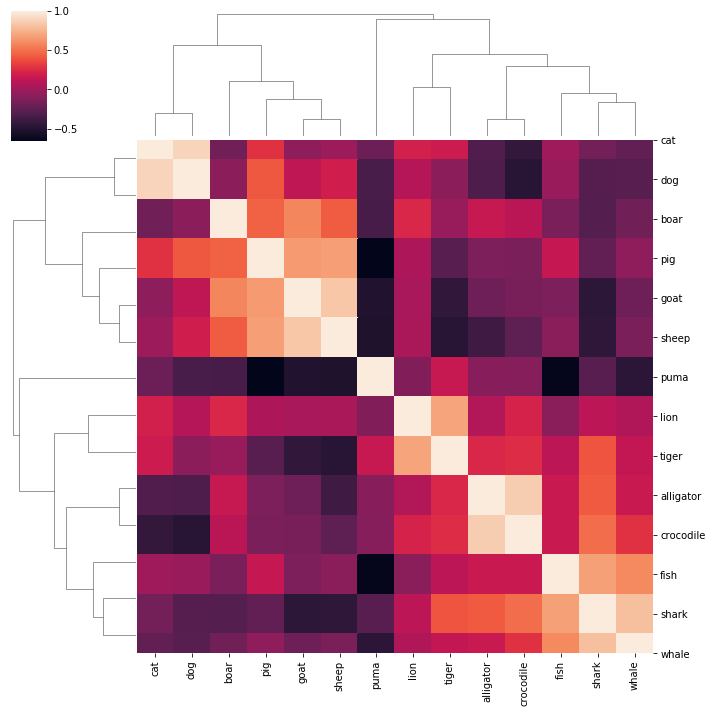

In [22]:
#let us create a clustermap using seaborn
c = df.corr()
import seaborn as sns
sns.clustermap(c)